# Trabajo Integrador Individual - NLP
## "De Texto Crudo a Insights: Pipeline Completo de Análisis de NLP"

**Fecha de entrega**: Jueves 25 de septiembre  
**Modalidad**: Individual  
**Formato**: Repositorio GitHub con notebook documentado


---

## Parte 2: Análisis Técnico - Estructura del Notebook

Tu notebook principal debe tener **exactamente** estas secciones, en este orden:

Análisis de los contenidos del discurso presidencial a lo largo del tiempo: Podemos conocer los principales objetivos, intereses, preocupaciones y necesidades de la ciudadania y su evolucion a lo largo del tiempo a partir del contenido de los discursos?
Estudio del contenido de los Mensajes Presidenciales de Apertura de Sesiones Ordinarias ante la Asamblea Legislativa
Este discurso se produce una vez por año en ocasion de la apertura de las sesiones ordinarias a principio del año.
Los textos se publican en la pagina del honorable congreso deliberante de la Nacion: https://www2.hcdn.gob.ar/secparl/dgral_info_parlamentaria/dip/documentos/mensajes_presidenciales.html
He incluido los textos de los precidentes a partir del retorno de la democracia 1984 hasta el 2025.
Son 42 documentos en formato pdf. El mayor inconveniente fue el pasaje de esos textos en formato pdf a formato txt. Ya que habia varios caracteres que provocaban que la la transcripcion ocasionara cortes de palabras y union de dos o mas palabras, en forma arbitraria.
Lo intente con el codigo presente arriba, abriendolos con word y convirtiendolos con un conversor online I love PDF, y en todos los casos tuve el mismo problema. Por lo tanto opte por copiar y pegar uno a uno en el notepad. Esto me permitio verificar rapidamente si alguna palabra se copiaba con errores ya que el notepad los marcaba.

OBJETIVOS:
Identificar las palabras y temas más recurrentes por año
Analizar la evolución de su vocabulario relacionado a necesidades, problematicas intereses y preocupaciones de la ciudadania a lo largo del tiempo
Encontrar cambios en los reclamos de la ciudadania en los aspectos mencionados, a partir de cambios en los patrones de los discursos.
Visualizar estos hallazgos de manera comprensible

INSTALO Y CARGO LIBRERIAS A UTILIZAR

In [27]:
# Instalamos las librerías necesarias en modo silencioso (-q)
!pip install spacy watermark -q
!python -m spacy download es_core_news_mg -q
import pandas as pd
import numpy as np
# import pickle # Removed pickle as it's not needed for reading text files
import re
import string
from collections import Counter
import spacy
from spacy import displacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Configuramos un estilo visual más prolijo para los gráficos y tablas
plt.style.use('seaborn-v0_8-darkgrid')
pd.set_option('display.max_colwidth', None)

print("Entorno configurado correctamente.")
# Librerías de NLP
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Librerías de visualización
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Configuración para Google Colab
from google.colab import drive

import nltk
nltk.download('stopwords')


✘ No compatible package found for 'es_core_news_mg' (spaCy v3.8.7)

Entorno configurado correctamente.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

CREO EL DATAFRAME A PARTIR DE LOS 42 TEXTOS DE LOS DISCURSOS.

In [54]:
# Configuración de pandas para mostrar más contenido en las celdas
pd.set_option('max_colwidth', 150)

drive.mount('/content/drive', force_remount=True)

path= '/content/drive/MyDrive/tecnicas de procesamiento del habla/corpus/'
# 2.1 Carga y organización de datos
# Definir los años disponibles en nuestro corpus
anios = [ '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
         '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015',
         '2016','2017','2018','2019','2020','2021','2022','2023','2024','2025']

# Diccionario para almacenar los textos de cada año
data = {}

# Contador para verificar la carga
archivos_cargados = 0
archivos_fallidos = 0

print("Iniciando carga de archivos...")
print("-" * 40)
# - Código para cargar todos los archivos de texto
# Cargar cada archivo de manera segura con manejo de errores

for anio in anios:
    nombre_archivo = path + anio + '.txt'
    print(nombre_archivo)
    try:
        with open(nombre_archivo, "r", encoding="utf-8") as archivo: # Changed to read as text file with utf-8 encoding
            data[anio] = archivo.read() # Changed to read the content directly

        # Mostrar información básica del archivo cargado
        num_caracteres = len(data[anio])
        num_palabras_aprox = len(data[anio].split())

        print(f"✓ {anio}: {num_caracteres:,} caracteres, ~{num_palabras_aprox:,} palabras")
        archivos_cargados += 1

    except FileNotFoundError:
       print(f"✗ No se encontró el archivo {anio}.txt")
       archivos_fallidos += 1
    except Exception as e:
       print(f"✗ Error cargando {anio}.txt: {e}")
       archivos_fallidos += 1

print("-" * 40)
print(f"Resumen: {archivos_cargados} archivos cargados, {archivos_fallidos} fallos")
# - Integración con metadatos
# - Verificación de integridad de datos
# Verificar que los datos se cargaron correctamente
print("Años disponibles en el corpus:")
print(list(data.keys()))
print()

# Mostrar un fragmento del primer año para entender el formato
print("Fragmento del año 2004 (primeros 500 caracteres):")
print("-" * 50)
print(data['2004'][0:500])
print("...")

# Convertir el diccionario a formato adecuado para DataFrame
# Necesitamos que cada valor sea una lista para que pandas pueda crear el DataFrame
data_combined = {key: [value] for (key, value) in data.items()}

# Crear DataFrame
data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']  # Renombrar la columna
data_df = data_df.sort_index()    # Ordenar por año

print("DataFrame creado exitosamente")
print(f"Dimensiones: {data_df.shape}")
print()
print("Estructura del DataFrame:")
print(data_df.head())



Mounted at /content/drive
Iniciando carga de archivos...
----------------------------------------
/content/drive/MyDrive/tecnicas de procesamiento del habla/corpus/1984.txt
✓ 1984: 118,777 caracteres, ~18,451 palabras
/content/drive/MyDrive/tecnicas de procesamiento del habla/corpus/1985.txt
✓ 1985: 77,439 caracteres, ~12,217 palabras
/content/drive/MyDrive/tecnicas de procesamiento del habla/corpus/1986.txt
✓ 1986: 84,914 caracteres, ~13,275 palabras
/content/drive/MyDrive/tecnicas de procesamiento del habla/corpus/1987.txt
✓ 1987: 79,551 caracteres, ~12,361 palabras
/content/drive/MyDrive/tecnicas de procesamiento del habla/corpus/1988.txt
✓ 1988: 58,940 caracteres, ~9,238 palabras
/content/drive/MyDrive/tecnicas de procesamiento del habla/corpus/1989.txt
✓ 1989: 39,655 caracteres, ~6,241 palabras
/content/drive/MyDrive/tecnicas de procesamiento del habla/corpus/1990.txt
✓ 1990: 49,688 caracteres, ~7,782 palabras
/content/drive/MyDrive/tecnicas de procesamiento del habla/corpus/1991.

PRIMER LIMPIEZA

In [55]:
# 2.2 Limpieza de texto
# - Aplicar técnicas vistas en clase:
#   * Conversión a minúsculas
#   * Eliminación de signos de puntuación
#   * Eliminación de números (si no son relevantes)  AL PRINCIPIO PENSE EN DEJAR LOS NUMEROS YA QUE HAY INDICADORES. PERO TAMBIEN DEBERIA DEJAR COMAS Y %
#      Y LUEGO PENSE QUE EN REALIDAD LO QUE ME INTERESABA ERAN LAS MENCIONES A LAS PROBLEMATICAS EN PRINCIPIO.
#   * Eliminación de caracteres especiales
# - Justificar cada decisión de limpieza
# Aplicar la limpieza

def clean_text_round1(text):
    """
    Primera ronda de limpieza de texto.

    Parámetros:
    text (str): Texto a limpiar

    Retorna:
    str: Texto limpio

    Procesos aplicados:
    1. Conversión a minúsculas
    2. Remoción de texto entre corchetes
    3. Remoción de signos de puntuación (incluyendo acentos españoles)
    4. Remoción de palabras que contienen números
    5. Limpieza de espacios extra
    """
    # Paso 1: Convertir a minúsculas para normalizar
    text = text.lower()

    # Paso 2: Remover texto entre corchetes (referencias, notas, etc.)
    text = re.sub(r'\[.*?\]', ' ', text)

    # Paso 3: Remover signos de puntuación (incluyendo signos españoles)
    # string.punctuation no incluye ¡¿, así que los agregamos manualmente
    punctuation_extended = string.punctuation + '¡¿""''–—'
    text = re.sub('[%s]' % re.escape(punctuation_extended), ' ', text)

    # Paso 4: Remover palabras que contienen números
    text = re.sub(r'\w*\d\w*', ' ', text)

    # Paso 5: Limpiar espacios múltiples y espacios al inicio/final
    text = re.sub(r'\s+', ' ', text).strip()

    return text





In [56]:
def aplicar_limpieza_corpus(dataframe):
    """
    Aplica la función de limpieza a todo el corpus.

    Esta función es más explícita que usar lambda,
    lo que facilita la comprensión para principiantes.
    """
    textos_limpios = []

    for i, texto in enumerate(dataframe.transcript):
        texto_limpio = clean_text_round1(texto)
        textos_limpios.append(texto_limpio)

        # Mostrar progreso cada 4 archivos
        if (i + 1) % 4 == 0:
            print(f"Procesados {i + 1} de {len(dataframe)} archivos")

    return pd.DataFrame(textos_limpios, columns=['transcript'], index=dataframe.index)


In [57]:
print("Aplicando primera ronda de limpieza...")
data_clean_round1 = aplicar_limpieza_corpus(data_df)
print("Primera limpieza completada")

Aplicando primera ronda de limpieza...
Procesados 4 de 42 archivos
Procesados 8 de 42 archivos
Procesados 12 de 42 archivos
Procesados 16 de 42 archivos
Procesados 20 de 42 archivos
Procesados 24 de 42 archivos
Procesados 28 de 42 archivos
Procesados 32 de 42 archivos
Procesados 36 de 42 archivos
Procesados 40 de 42 archivos
Primera limpieza completada


In [58]:
def clean_text_round2(text):
    """
    Segunda ronda de limpieza: caracteres especiales y formato.

    Procesos aplicados:
    1. Remoción de comillas especiales y puntos suspensivos
    2. Normalización de saltos de línea
    """
    # Remover comillas especiales, puntos suspensivos, y comillas de diálogo
    text = re.sub('[''""…«»]', '', text)

    # Reemplazar saltos de línea con espacios
    text = re.sub('\n', ' ', text)

    return text

# Aplicar segunda limpieza
print("Aplicando segunda ronda de limpieza...")

textos_finales = []
for texto in data_clean_round1.transcript:
    texto_final = clean_text_round2(texto)
    textos_finales.append(texto_final)

data_clean = pd.DataFrame(textos_finales, columns=['transcript'], index=data_clean_round1.index)
print("Segunda limpieza completada")
# Comparar texto original vs. texto limpio
print("Comparación: Texto Original vs. Texto Limpio")
print("=" * 60)
print("ORIGINAL (2004, primeros 300 caracteres):")
print(data_df.transcript['2004'][:300])
print()
print("LIMPIO (2004, primeros 300 caracteres):")
print(data_clean.transcript['2004'][:300])
# Guardar el corpus limpio para uso futuro
data_clean.to_pickle(path + "corpus_limpio.pkl")
print("Corpus limpio guardado exitosamente")

Aplicando segunda ronda de limpieza...
Segunda limpieza completada
Comparación: Texto Original vs. Texto Limpio
ORIGINAL (2004, primeros 300 caracteres):
Presidente: Néstor Carlos Kirchner
Año: 2004

Sr. Presidente de la Nación. — Señores miembros del Congreso Nacional, pueblo de mi Patria:
en virtud del inciso 8 del artículo 99 de la Constitución de la Nación Argentina venimos a dar
cuenta del estado de la Nación ante esta Asamblea Legislativa.
En c

LIMPIO (2004, primeros 300 caracteres):
presidente néstor carlos kirchner año sr presidente de la nación señores miembros del congreso nacional pueblo de mi patria en virtud del inciso del artículo de la constitución de la nación argentina venimos a dar cuenta del estado de la nación ante esta asamblea legislativa en ciento cincuenta y un
Corpus limpio guardado exitosamente


PROCESAMIENTO CON BoW  Separar texto en palabras
ELIJO LEMATIZACION. PORQUE ESTOY TRABAJANDO EN ESPAñOL DONDE LA MORFOLOGIA ES MUY RICA, EL STEAMMMING PUEDE GENERAR BASTANTES ERRORES.
LA LEMMATIZAION AL USAR LA MORFOLOGIA Y EL DICCIONARIO CREO QUE VA A FUNCIONAR MEJOR PARA EXTRAER TEMAS

In [59]:
# 2.3 Tokenización y normalización
# - Separar texto en palabras
# - Decidir si aplicar stemming o lemmatización (justificar)
#    ELIJO LEMATIZACION. PORQUE ESTOY TRABAJANDO EN ESPAñOL DONDE LA MORFOLOGIA ES MUY RICA, EL STEAMMMING PUEDE GENERAR BASTANTES ERRORES.
#    LA LEMATIZAION AL USAR LA MORFOLOGIA Y EL DICCIONARIO CREO QUE VA A FUNCIONAR MEJOR PARA EXTRAER TEMAS

# 2.4 Manejo de stop words
# Descargar recursos de NLTK si no están disponibles
try:
    nltk.data.find('corpora/stopwords')
    print("Recursos de stopwords ya disponibles")
except LookupError:
    print("Descargando stopwords de NLTK...")
    nltk.download('stopwords')

# Cargar stopwords en español
stopwords_spanish = nltk.corpus.stopwords.words('spanish')

print(f"Número de stopwords en español: {len(stopwords_spanish)}")
print("\nPrimeras 50 stopwords:")
print(stopwords_spanish[:50])

# Crear el vectorizador con stopwords
print("Creando vectorizador Bag of Words...")

# CountVectorizer convierte texto a matriz de conteos
vectorizador = CountVectorizer(
    stop_words=stopwords_spanish,  # Filtrar stopwords en español
    lowercase=True,                # Ya está en minúsculas, pero por seguridad
    token_pattern=r'\b[a-záéíóúñü]+\b'  # Solo palabras con letras españolas
)

print("Configuración del vectorizador:")
print(f"- Stop words: {len(stopwords_spanish)} palabras filtradas")
print(f"- Patrón de tokens: Solo letras del alfabeto español")
# Aplicar vectorización al corpus limpio
print("Vectorizando corpus...")
print("Esto puede tomar unos momentos debido al tamaño del corpus")

# Fit_transform ajusta el vectorizador y aplica la transformación
matriz_documentos_terminos = vectorizador.fit_transform(data_clean.transcript)

print(f"Matriz creada exitosamente:")
print(f"- Dimensiones: {matriz_documentos_terminos.shape[0]} documentos x {matriz_documentos_terminos.shape[1]} palabras únicas")
print(f"- Tipo: {type(matriz_documentos_terminos).__name__} (matriz esparsa)")
print(f"- Elementos no-cero: {matriz_documentos_terminos.nnz:,}")

# Convertir a DataFrame para facilitar el análisis
print("Convirtiendo matriz esparsa a DataFrame...")

# Obtener nombres de las características (palabras)
nombres_palabras = vectorizador.get_feature_names_out()

# Convertir a matriz densa (¡cuidado con la memoria!)
data_bow = pd.DataFrame(
    matriz_documentos_terminos.toarray(),
    columns=nombres_palabras,
    index=data_clean.index
)

print(f"DataFrame creado:")
print(f"- Dimensiones: {data_bow.shape}")
print(f"- Memoria aproximada: {data_bow.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# Mostrar una muestra pequeña
print("\nMuestra de la matriz (primeras 5 palabras):")
display(data_bow.iloc[:, :5])
# Transponer la matriz para facilitar el análisis por año
data_transpuesta = data_bow.transpose()

print("Matriz transpuesta para análisis:")
print(f"- Filas (palabras): {data_transpuesta.shape[0]}")
print(f"- Columnas (años): {data_transpuesta.shape[1]}")
print()
print("Primeras 5 palabras y sus frecuencias por año:")
display(data_transpuesta.head())
# - Decidir qué stop words usar (español estándar + específicas del dominio)
#   ANALIZAR Y PENSAR MAS
# - Mostrar impacto de eliminar stop words
# - Justificar decisiones

# 2.5 Estadísticas post-procesamiento
# Función para obtener las palabras más frecuentes por año
def obtener_palabras_frecuentes(data_transpuesta, num_palabras=30):
    """
    Obtiene las palabras más frecuentes para cada año.

    Parámetros:
    data_transpuesta: DataFrame con palabras como filas y años como columnas
    num_palabras: Número de palabras más frecuentes a extraer

    Retorna:
    dict: Diccionario con año como clave y lista de (palabra, frecuencia) como valor
    """
    palabras_por_anio = {}

    for anio in data_transpuesta.columns:
        # Ordenar palabras por frecuencia descendente
        top_palabras = data_transpuesta[anio].sort_values(ascending=False).head(num_palabras)

        # Convertir a lista de tuplas (palabra, frecuencia)
        palabras_por_anio[anio] = list(zip(top_palabras.index, top_palabras.values))

    return palabras_por_anio

# Obtener las 30 palabras más frecuentes por año
top_palabras_anio = obtener_palabras_frecuentes(data_transpuesta, 30)
# Mostrar las 30 palabras más frecuentes por año
print("TOP 30 PALABRAS MÁS FRECUENTES POR AÑO")
print("=" * 50)

for anio, palabras_frecuencias in top_palabras_anio.items():
    print(f"\n{anio}:")

    # Extraer solo las palabras (sin las frecuencias) de las primeras 15
    palabras = [palabra for palabra, frecuencia in palabras_frecuencias[:15]]

    # Mostrar en formato legible
    print(", ".join(palabras))

    # Mostrar también la palabra más frecuente con su conteo
    palabra_top, frecuencia_top = palabras_frecuencias[0]
    print(f"  (Más frecuente: '{palabra_top}' con {frecuencia_top} apariciones)")


# Analizar qué palabras aparecen frecuentemente en múltiples años
print("Analizando palabras que aparecen frecuentemente en múltiples años...")

# Crear lista con todas las palabras frecuentes
todas_las_palabras_frecuentes = []

for anio in anios:
    palabras_del_anio = [palabra for (palabra, frecuencia) in top_palabras_anio[anio]]
    todas_las_palabras_frecuentes.extend(palabras_del_anio)

# Contar cuántas veces aparece cada palabra en los tops
contador_palabras = Counter(todas_las_palabras_frecuentes)

print("\nPalabras que aparecen en el top de múltiples años:")
print("(palabra: número de años en los que está en el top)")
print("-" * 50)

for palabra, count in contador_palabras.most_common(25):
    print(f"{palabra}: {count} años")
# Definir criterio para stop words adicionales
# Si una palabra aparece en el top de más de la mitad de los años (>21), la consideramos stop word
umbral_stopword = len(anios) // 2  # 21 años de los 42 totales

stopwords_adicionales = [
    palabra for palabra, count in contador_palabras.most_common()
    if count > umbral_stopword
]
# Combinar todas las listas de stop words
print(f"Stop words adicionales identificadas (aparecen en >{umbral_stopword} años):")
print(stopwords_adicionales)
print(f"\nTotal de stop words adicionales: {len(stopwords_adicionales)}")
# Agregar stop words específicas del contexto (nombres propios, palabras muy generales)
stopwords_contextuales = [
    # Nombres propios que aparecen frecuentemente
    'mauricio', 'macri', 'cristina','kirchner', 'nestor', 'alberto','fernández', 'eduardo', 'duhalde', 'carlos', 'saul', 'menem', 'fernando', 'rúa', 'javier', 'milei', 'raúl', 'ricardo' ,'alfonsín',
    # Números escritos
    'uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis', 'siete', 'ocho', 'nueve', 'diez',
    # Palabras muy generales
    'cosa', 'cosas', 'tan', 'así', 'asi', 'luego', 'quizá', 'todas', 'sólo', 'argentinos', 'argentinas', 'argentina', 'senado', 'senador', 'senadora', 'presidente', 'presidenta', 'nación', 'diputado',
    'diputada', 'vicepresidente', 'vicepresidenta', 'argentina', 'república', 'nación', 'solo',
    # Agregadas despues de la primer depuracion
    'cada', 'si', 'marzo', 'legislativa', 'pág', 'materia', 'sino', 'vez', 'señores', 'mil', 'r',
    'primer', 'primera', 'segundo', 'segunda', 'año', 'años'
]


# - Vocabulario final (número de palabras únicas)
# - Distribución de frecuencias
# - Comparación antes/después del preprocesamiento

stopwords_completas = stopwords_spanish + stopwords_adicionales + stopwords_contextuales

print(f"Stop words totales: {len(stopwords_completas)}")
print(f"- NLTK español: {len(stopwords_spanish)}")
print(f"- Adicionales del corpus: {len(stopwords_adicionales)}")
print(f"- Contextuales: {len(stopwords_contextuales)}")
# Crear nuevo vectorizador con stop words ampliadas
print("Re-vectorizando con stop words mejoradas...")

vectorizador_mejorado = CountVectorizer(
    stop_words=stopwords_completas,
    lowercase=True,
    token_pattern=r'\b[a-záéíóúñü]+\b',
    min_df=2  # Ignorar palabras que aparecen en menos de 2 documentos
)

# Aplicar nueva vectorización
matriz_mejorada = vectorizador_mejorado.fit_transform(data_clean.transcript)

print(f"Nueva matriz creada:")
print(f"- Dimensiones: {matriz_mejorada.shape[0]} documentos x {matriz_mejorada.shape[1]} palabras")
print(f"- Reducción de vocabulario: {data_bow.shape[1] - matriz_mejorada.shape[1]} palabras eliminadas")
print(f"- Porcentaje de reducción: {(1 - matriz_mejorada.shape[1]/data_bow.shape[1])*100:.1f}%")
# Convertir a DataFrame la matriz mejorada
nombres_palabras_mejorado = vectorizador_mejorado.get_feature_names_out()

data_bow_final = pd.DataFrame(
    matriz_mejorada.toarray(),
    columns=nombres_palabras_mejorado,
    index=data_clean.index
)

print("DataFrame final creado exitosamente")
print(f"Vocabulario final: {len(nombres_palabras_mejorado)} palabras únicas")

# Guardar resultados
data_bow_final.to_pickle(path + "bow_matriz_final.pkl")
# pickle.dump(vectorizador_mejorado, open(path + "vectorizador_final.pkl", "wb")) # Removed pickle dump
print("Archivos guardados exitosamente")


# Reproceso del analisis de frecuencias con vocabulario mejorado
# trasponer matriz final
data_transpuesta_final = data_bow_final.transpose()

print("Matriz transpuesta final para análisis:")
print(f"- Filas (palabras): {data_transpuesta_final.shape[0]}")
print(f"- Columnas (años): {data_transpuesta_final.shape[1]}")
print()

# obtener las 30 palabras frecuentes por cada año con la matriz mejorada
top_palabras_anio_final = obtener_palabras_frecuentes(data_transpuesta_final, 30)

# mostrar las 30 palabras frecuentes por cada año con la matriz mejorada
print("TOP 30 PALABRAS MÁS FRECUENTES POR AÑO (con vocabulario mejorado)")
print("=" * 70)

for anio, palabras_frecuencias in top_palabras_anio_final.items():
    print(f"\n{anio}:")

    # Extract only the words (without frequencies) from the first 15
    palabras = [palabra for palabra, frecuencia in palabras_frecuencias[:15]]

    # Display in a readable format
    print(", ".join(palabras))

    # Also display the most frequent word with its count
    palabra_top, frecuencia_top = palabras_frecuencias[0]
    print(f"  (Más frecuente: '{palabra_top}' con {frecuencia_top} apariciones)")

# Analizar qué palabras aparecen frecuentemente en múltiples años
print("Analizando palabras que aparecen frecuentemente en múltiples años...")

# Crear lista con todas las palabras frecuentes
todas_las_palabras_frecuentes_final = []

for anio in anios:
    palabras_del_anio = [palabra for (palabra, frecuencia) in top_palabras_anio_final[anio]]
    todas_las_palabras_frecuentes_final.extend(palabras_del_anio)

# Contar cuántas veces aparece cada palabra en los tops
contador_palabras = Counter(todas_las_palabras_frecuentes_final)

print("\nPalabras que aparecen en el top de múltiples años:")
print("(palabra: número de años en los que está en el top)")
print("-" * 50)

for palabra, count in contador_palabras.most_common(25):
    print(f"{palabra}: {count} años")

Recursos de stopwords ya disponibles
Número de stopwords en español: 313

Primeras 50 stopwords:
['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni']
Creando vectorizador Bag of Words...
Configuración del vectorizador:
- Stop words: 313 palabras filtradas
- Patrón de tokens: Solo letras del alfabeto español
Vectorizando corpus...
Esto puede tomar unos momentos debido al tamaño del corpus
Matriz creada exitosamente:
- Dimensiones: 42 documentos x 23932 palabras únicas
- Tipo: csr_matrix (matriz esparsa)
- Elementos no-cero: 97,588
Convirtiendo matriz esparsa a DataFrame...
DataFrame creado:
- Dimensiones: (42, 23932)
- Memoria aproximada: 7.7 MB

Muestra de la matriz (primeras 5 pa

,abajo,abanderado,abandona,abandonada,abandonadas
1984,1,0,0,0,0
1985,0,0,0,0,0
1986,0,0,0,0,0
1987,0,0,0,0,0
1988,0,0,0,0,0
1989,0,0,0,0,1
1990,0,0,0,0,0
1991,0,0,0,0,0
1992,0,0,0,0,0
1993,0,0,0,0,0


Matriz transpuesta para análisis:
- Filas (palabras): 23932
- Columnas (años): 42

Primeras 5 palabras y sus frecuencias por año:


,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
abajo,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
abanderado,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
abandona,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
abandonada,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandonadas,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TOP 30 PALABRAS MÁS FRECUENTES POR AÑO

1984:
nacional, país, política, gobierno, ciento, social, argentina, sistema, régimen, sector, situación, ley, desarrollo, área, así
  (Más frecuente: 'nacional' con 79 apariciones)

1985:
gobierno, nacional, trabajo, nación, libertad, poder, política, país, argentina, esfuerzo, vida, social, recursos, cada, ejecutivo
  (Más frecuente: 'gobierno' con 50 apariciones)

1986:
democracia, nacional, país, sólo, institucional, argentina, sino, así, política, si, hoy, gobierno, congreso, proceso, sistema
  (Más frecuente: 'democracia' con 40 apariciones)

1987:
sociedad, democracia, pueblo, país, si, social, ser, pasado, cada, debemos, sino, debe, sólo, nación, cambio
  (Más frecuente: 'sociedad' con 66 apariciones)

1988:
nacional, gobierno, argentina, política, hoy, país, año, educación, social, crecimiento, empresas, gasto, sociedad, deuda, público
  (Más frecuente: 'nacional' con 33 apariciones)

1989:
democracia, gobierno, crisis, país, sólo, veces

In [60]:
# Configuración para las nubes de palabras
configuracion_wordcloud = {
    'stopwords': set(stopwords_completas),  # Usar nuestras stop words
    'background_color': 'white',
    'colormap': 'Dark2',                    # Esquema de colores profesional
    'max_font_size': 150,                   # Tamaño máximo de fuente
    'random_state': 42,                     # Para resultados reproducibles
    'width': 800,
    'height': 600,
    'max_words': 30                        # Máximo 30 palabras por nube
}

# Crear el generador de nubes de palabras
generador_wordcloud = WordCloud(**configuracion_wordcloud)

print("Configuración de nubes de palabras establecida")
print(f"Máximo de palabras por nube: {configuracion_wordcloud['max_words']}")

Configuración de nubes de palabras establecida
Máximo de palabras por nube: 30


In [61]:
# Crear nubes de palabras para cada año
print("Generando nubes de palabras por año...")

# Configurar el tamaño de la figura para acomodar 42 subplots (e.g., 7 filas x 6 columnas)
num_cols = 6
num_rows = (len(anios) + num_cols - 1) // num_cols # Calculate number of rows needed

plt.figure(figsize=(num_cols * 4, num_rows * 3)) # Adjust figure size based on grid dimensions

plt.suptitle('Evolución del Vocabulario de discursos presidenciales de apertura asambleas legislativas (1984-2025)',
             fontsize=20, fontweight='bold', y=0.98)

# Crear una nube para cada año
for i, anio in enumerate(anios):
    # Obtener el texto del año
    texto_anio = data_clean.transcript[anio]

    # Generar la nube de palabras
    nube_palabras = generador_wordcloud.generate(texto_anio)

    # Crear subplot
    plt.subplot(num_rows, num_cols, i + 1) # Use calculated rows and columns
    plt.imshow(nube_palabras, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{anio}', fontsize=16, fontweight='bold', pad=10)

# Ajustar espaciado
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

print("Nubes de palabras generadas exitosamente")

Output hidden; open in https://colab.research.google.com to view.

In [62]:
# Calcular estadísticas detalladas por año
def calcular_estadisticas_corpus(data_bow_final):
    """
    Calcula estadísticas comprehensivas del corpus por año.

    Retorna:
    DataFrame con estadísticas por año
    """
    estadisticas = []

    for i, anio in enumerate(anios):
        # Obtener datos del año
        datos_anio = data_bow_final.loc[anio]

        # Calcular métricas
        palabras_unicas = (datos_anio > 0).sum()  # Número de palabras diferentes
        palabras_totales = datos_anio.sum()       # Número total de palabras
        diversidad_lexica = palabras_unicas / palabras_totales  # Ratio de diversidad

        # Palabra más frecuente
        palabra_top = datos_anio.idxmax()
        frecuencia_top = datos_anio.max()

        estadisticas.append({
            'Año': anio,
            'Palabras_Unicas': palabras_unicas,
            'Palabras_Totales': palabras_totales,
            'Diversidad_Lexica': round(diversidad_lexica, 4),
            'Palabra_Mas_Frecuente': palabra_top,
            'Frecuencia_Top': frecuencia_top
        })

    return pd.DataFrame(estadisticas)

# Calcular estadísticas
estadisticas_corpus = calcular_estadisticas_corpus(data_bow_final)

print("ESTADÍSTICAS DEL CORPUS POR AÑO")
print("=" * 50)
print(estadisticas_corpus.to_string(index=False))

ESTADÍSTICAS DEL CORPUS POR AÑO
 Año  Palabras_Unicas  Palabras_Totales  Diversidad_Lexica Palabra_Mas_Frecuente  Frecuencia_Top
1984             3263              7857             0.4153               sistema              33
1985             2506              5157             0.4859              libertad              33
1986             2609              5610             0.4651            democracia              40
1987             2437              5270             0.4624              sociedad              66
1988             2133              4014             0.5314             educación              18
1989             1546              2536             0.6096            democracia              27
1990             1829              3235             0.5654                 mundo              19
1991             1504              2559             0.5877                   ley              18
1992             1472              2486             0.5921                 puede              1

ANALIZANDO EL CORPUS CON TF-IDF

In [63]:
print("\n--- IMPLEMENTANDO TF-IDF ---")

# Paso 1: Inicializar el TfidfVectorizer.
# Funciona de manera muy similar al CountVectorizer.
tfidf_vect = TfidfVectorizer(
    stop_words=stopwords_completas,  # Usar las stopwords completas
    lowercase=True,                # Ya está en minúsculas, pero por seguridad
    token_pattern=r'\b[a-záéíóúñü]+\b',  # Solo palabras con letras españolas
    min_df=2 # Ignorar palabras que aparecen en menos de 2 documentos
)

# Paso 2: Aprender el vocabulario y transformar el corpus.
tfidf_rep = tfidf_vect.fit_transform(data_clean.transcript )

# Paso 3: Analizar los resultados.
# print("\nVocabulario TF-IDF (es el mismo que en BoW):", tfidf_vect.vocabulary_) # Commented out as requested

# Mostramos la matriz completa con los pesos TF-IDF.
tfidf_vocab = tfidf_vect.get_feature_names_out()
df_tfidf = pd.DataFrame(tfidf_rep.toarray(), columns=tfidf_vocab, index=data_clean.index) # Use the original index (years)

print("\nMatriz completa de TF-IDF (primeros 5 documentos y 10 palabras):")
display(df_tfidf.iloc[:5, :10].round(3)) # Display a smaller sample

# Transponer la matriz TF-IDF para facilitar el análisis por año
tfidf_transpuesta = df_tfidf.transpose()

print("\nMatriz TF-IDF transpuesta para análisis:")
print(f"- Filas (palabras): {tfidf_transpuesta.shape[0]}")
print(f"- Columnas (años): {tfidf_transpuesta.shape[1]}")


# Función para obtener las palabras con mayor peso TF-IDF por año
def obtener_top_tfidf_por_anio(tfidf_transpuesta, num_palabras=15):
    """
    Obtiene las palabras con mayor peso TF-IDF para cada año.

    Parámetros:
    tfidf_transpuesta: DataFrame con palabras como filas y años como columnas (pesos TF-IDF)
    num_palabras: Número de palabras con mayor peso TF-IDF a extraer

    Retorna:
    dict: Diccionario con año como clave y lista de (palabra, peso_tfidf) como valor
    """
    top_tfidf_anio = {}

    for anio in tfidf_transpuesta.columns:
        # Ordenar palabras por peso TF-IDF descendente
        top_palabras = tfidf_transpuesta[anio].sort_values(ascending=False).head(num_palabras)

        # Convertir a lista de tuplas (palabra, peso_tfidf)
        top_tfidf_anio[anio] = list(zip(top_palabras.index, top_palabras.values))

    return top_tfidf_anio

# Obtener las 15 palabras con mayor peso TF-IDF por año
top_tfidf_anio = obtener_top_tfidf_por_anio(tfidf_transpuesta, 15)

# Analizar qué palabras aparecen frecuentemente en el top 15 TF-IDF de múltiples años
# Esto es necesario para poder mostrar la cantidad de años en el listado por año
print("\nAnalizando palabras que aparecen frecuentemente en el top 15 TF-IDF de múltiples años para el listado por año:")
print("-" * 80)

# Crear lista con todas las palabras del top 15 TF-IDF de cada año
todas_las_palabras_top_tfidf_para_listado = []

for anio in anios:
    # Get the top 15 words for the current year
    palabras_del_anio = [palabra for (palabra, peso) in top_tfidf_anio[anio]]
    todas_las_palabras_top_tfidf_para_listado.extend(palabras_del_anio)

# Count how many times each word appears in the top 15 lists across all years
contador_palabras_top_tfidf_para_listado = Counter(todas_las_palabras_top_tfidf_para_listado)

print("Conteo de años por palabra en el top 15 calculado.")

# Mostrar las 15 palabras con mayor peso TF-IDF por año, mostrando la cantidad de años en el top 15
print("\nTOP 15 PALABRAS CON MAYOR PESO TF-IDF POR AÑO (mostrando años en el top 15 general)")
print("=" * 80)

for anio, palabras_pesos in top_tfidf_anio.items():
    print(f"\n{anio}:")

    # Extraer las palabras y buscar su conteo en el top 15 general
    palabras_con_conteo = []
    for palabra, peso in palabras_pesos:
        conteo_anios = contador_palabras_top_tfidf_para_listado.get(palabra, 0) # Get count, default to 0 if not found
        palabras_con_conteo.append(f"{palabra} ({conteo_anios} años)")

    # Mostrar en formato legible
    print(", ".join(palabras_con_conteo))


# Obtener las 30 palabras con mayor peso TF-IDF en todo el corpus
print("\nTOP 30 PALABRAS CON MAYOR PESO TF-IDF EN TODO EL CORPUS")
print("=" * 60)

# Calcular la suma de los pesos TF-IDF por palabra en todo el corpus
suma_tfidf_palabras = df_tfidf.sum(axis=0)

# Obtener las 30 palabras con mayor suma de TF-IDF
top_tfidf_total = suma_tfidf_palabras.sort_values(ascending=False).head(30)

# Mostrar las palabras y sus sumas de TF-IDF
for palabra, suma_peso in top_tfidf_total.items():
    print(f"- {palabra}: {suma_peso:.4f}")

# Analizar qué palabras aparecen frecuentemente en el top 15 TF-IDF de múltiples años (este ya estaba)
print("\nAnalizando palabras que aparecen frecuentemente en el top 15 TF-IDF de múltiples años (conteo general):")
print("(palabra: número de años en los que está en el top 15)")
print("-" * 70)

# Usar el contador_palabras_top_tfidf_para_listado que ya calculamos
for palabra, count in contador_palabras_top_tfidf_para_listado.most_common(25):
    print(f"{palabra}: {count} años")


--- IMPLEMENTANDO TF-IDF ---

Matriz completa de TF-IDF (primeros 5 documentos y 10 palabras):


,abajo,abandona,abandonadas,abandonado,abandonados,abandonan,abandonar,abandonaron,abandonemos,abandonen
1984,0.007,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0
1985,0.000,0.0,0.0,0.0,0.014,0.0,0.010,0.0,0.0,0.0
1986,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0
1987,0.000,0.0,0.0,0.0,0.000,0.0,0.009,0.0,0.0,0.0
1988,0.000,0.0,0.0,0.0,0.000,0.0,0.012,0.0,0.0,0.0



Matriz TF-IDF transpuesta para análisis:
- Filas (palabras): 12133
- Columnas (años): 42

Analizando palabras que aparecen frecuentemente en el top 15 TF-IDF de múltiples años para el listado por año:
--------------------------------------------------------------------------------
Conteo de años por palabra en el top 15 calculado.

TOP 15 PALABRAS CON MAYOR PESO TF-IDF POR AÑO (mostrando años en el top 15 general)

1984:
área (1 años), reconciliación (1 años), régimen (1 años), sistema (15 años), situación (1 años), sector (3 años), entidades (1 años), desarrollo (11 años), militar (1 años), ley (14 años), fragmentación (1 años), encontramos (2 años), estudios (1 años), obras (2 años), implementación (1 años)

1985:
libertad (4 años), honorabilidad (2 años), poder (8 años), esfuerzo (1 años), recursos (4 años), vida (3 años), ejecutivo (1 años), defensa (1 años), ciudadanos (1 años), transcurrido (1 años), cartagena (1 años), autoridad (1 años), acción (2 años), argentino (4 años), pu

In [64]:
# 4.1 Aplicación de embeddings
# - Procesar tu corpus con spaCy
# - Obtener vectores para documentos (promedio de vectores de palabras)
# - Explicar qué son los embeddings y por qué son diferentes a BoW (Esto se hará en una celda de texto posterior)

print("Procesando el corpus con spaCy para obtener embeddings...")

# Procesar cada documento con spaCy and store the doc objects
corpus_spacy_docs = []
for anio, texto in data_clean.transcript.items():

    doc = nlp(texto, disable=['parser', 'ner'])
    corpus_spacy_docs.append(doc)

    if (len(corpus_spacy_docs)) % 10 == 0:
        print(f"  Procesados {len(corpus_spacy_docs)} documentos...")

print(f"Procesamiento con spaCy completado. Total de documentos procesados: {len(corpus_spacy_docs)}")


print("Obteniendo vectores de documentos...")

try:
    document_vectors = [doc.vector for doc in corpus_spacy_docs]
    df_document_vectors = pd.DataFrame(
        document_vectors,
        index=data_clean.index
    )

    print(f"Vectores de documentos obtenidos and saved to a DataFrame.")
    print(f"Dimensions of the vector DataFrame: {df_document_vectors.shape}")
    print(f"Vector of the 1984 document (first 10 dimensions): {df_document_vectors.iloc[0, :10].tolist()}")

except Exception as e:
    print(f"Error getting document vectors: {e}")
    print("Ensure that the loaded spaCy model ('es_core_news_md') contains word vectors.")

Procesando el corpus con spaCy para obtener embeddings...
  Procesados 10 documentos...
  Procesados 20 documentos...
  Procesados 30 documentos...
  Procesados 40 documentos...
Procesamiento con spaCy completado. Total de documentos procesados: 42
Obteniendo vectores de documentos...
Vectores de documentos obtenidos and saved to a DataFrame.
Dimensions of the vector DataFrame: (42, 300)
Vector of the 1984 document (first 10 dimensions): [1.57691490650177, 1.2052866220474243, 0.7787942886352539, -0.7941731214523315, 2.428189992904663, -0.6689862012863159, -0.178866446018219, -0.8140300512313843, -0.1004350408911705, 1.6010090112686157]


BoW representa un texto como una bolsa de palabras.
Cuenta cuántas veces aparece cada palabra en un documento.
de esta forma se pierde el orden y el contexto.

por ejemplo: "El presidente habló de la economía" y "La economía preocupa al presidente"
Tenemos que
presidente: [1,1]
habló: [1,0]
economía: [1,1]
preocupa: [0,1]
Los vectores correspondientes al vocabulario son enormes y dispersos
No entiende los sinonimos (“habló” ≠ “dijo”.) y no entiende el contexto (banco de plaza” ≠ “banco financiero”)
Los Embeddings son representaciones numéricas densas de palabras, frases o documentos. Cada palabra se transforma en un vector en un espacio de menor dimensión (ej. 300).
Los vectores capturan significado semántico gracias al entrenamiento en grandes corpus.
reconocen similitudes semánticas (palabras con significados similares tienen vectores cercanos).

In [65]:
# 4.2 Análisis de similitud semántica
# - Calcular similitud entre documentos usando embeddings
from sklearn.metrics.pairwise import cosine_similarity # Import cosine_similarity

print("\n--- Calculando similitud entre documentos usando Embeddings ---")

# Calcular la matriz de similitud coseno
# Usamos la matriz de vectores de documentos (df_document_vectors)
similitud_matriz_embeddings = cosine_similarity(df_document_vectors)

# Convertir la matriz de similitud a un DataFrame para mejor visualización, usando los años como índices y columnas
similitud_df_embeddings = pd.DataFrame(
    similitud_matriz_embeddings,
    index=data_clean.index,
    columns=data_clean.index
)

print("\nMatriz de similitud coseno entre documentos (usando Embeddings):")
# Mostrar la matriz de similitud (primeras 5 filas y columnas para brevedad)
display(similitud_df_embeddings.iloc[:42, :42].round(4))

# Encontrar los pares de documentos más similares (excluyendo la similitud de un documento consigo mismo)
# Apilar la matriz de similitud para facilitar la búsqueda
similitud_apilada = similitud_df_embeddings.stack()

# Eliminar las similitudes de un documento consigo mismo (donde año1 == año2)
similitud_pares = similitud_apilada[similitud_apilada.index.get_level_values(0) != similitud_apilada.index.get_level_values(1)]

# Ordenar por similitud descendente para encontrar los más similares
pares_mas_similares = similitud_pares.sort_values(ascending=False).head(42)

print("\nLos 10 pares de documentos más similares (usando Embeddings):")
print("-" * 50)
for (anio1, anio2), similitud in pares_mas_similares.items():
    print(f"  {anio1} vs {anio2}: {similitud:.4f}")

# Encontrar los pares de documentos más diferentes (ordenar por similitud ascendente)
pares_mas_diferentes = similitud_pares.sort_values(ascending=True).head(42)

print("\nLos 10 pares de documentos más diferentes (usando Embeddings):")
print("-" * 50)
for (anio1, anio2), similitud in pares_mas_diferentes.items():
    print(f"  {anio1} vs {anio2}: {similitud:.4f}")


# - Comparar con resultados de TF-IDF (Esto se hará en una celda de texto posterior)
# - ¿Qué documentos son más similares según embeddings? (Ya mostrado arriba)
# - ¿Coinciden los resultados con TF-IDF? (Comparación posterior)


--- Calculando similitud entre documentos usando Embeddings ---

Matriz de similitud coseno entre documentos (usando Embeddings):


,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
1984,1.0000,0.9941,0.9908,0.9776,0.9938,0.9563,0.9689,0.9757,0.9732,0.9952,...,0.9704,0.9612,0.9318,0.9418,0.9916,0.9931,0.9898,0.9873,0.9668,0.9651
1985,0.9941,1.0000,0.9969,0.9896,0.9980,0.9754,0.9826,0.9875,0.9863,0.9928,...,0.9830,0.9745,0.9506,0.9599,0.9958,0.9966,0.9950,0.9897,0.9788,0.9782
1986,0.9908,0.9969,1.0000,0.9962,0.9979,0.9838,0.9913,0.9940,0.9919,0.9913,...,0.9888,0.9817,0.9625,0.9701,0.9964,0.9965,0.9963,0.9914,0.9847,0.9849
1987,0.9776,0.9896,0.9962,1.0000,0.9914,0.9911,0.9964,0.9953,0.9943,0.9815,...,0.9912,0.9867,0.9738,0.9798,0.9910,0.9900,0.9912,0.9861,0.9878,0.9874
1988,0.9938,0.9980,0.9979,0.9914,1.0000,0.9789,0.9865,0.9913,0.9884,0.9946,...,0.9863,0.9794,0.9570,0.9651,0.9974,0.9978,0.9963,0.9911,0.9831,0.9833
1989,0.9563,0.9754,0.9838,0.9911,0.9789,1.0000,0.9927,0.9924,0.9895,0.9639,...,0.9908,0.9878,0.9841,0.9890,0.9793,0.9786,0.9813,0.9769,0.9903,0.9914
1990,0.9689,0.9826,0.9913,0.9964,0.9865,0.9927,1.0000,0.9978,0.9971,0.9774,...,0.9954,0.9913,0.9827,0.9870,0.9892,0.9876,0.9897,0.9844,0.9915,0.9926
1991,0.9757,0.9875,0.9940,0.9953,0.9913,0.9924,0.9978,1.0000,0.9969,0.9838,...,0.9953,0.9900,0.9789,0.9836,0.9930,0.9917,0.9933,0.9878,0.9918,0.9930
1992,0.9732,0.9863,0.9919,0.9943,0.9884,0.9895,0.9971,0.9969,1.0000,0.9791,...,0.9934,0.9868,0.9743,0.9822,0.9901,0.9896,0.9903,0.9853,0.9907,0.9923
1993,0.9952,0.9928,0.9913,0.9815,0.9946,0.9639,0.9774,0.9838,0.9791,1.0000,...,0.9788,0.9738,0.9495,0.9536,0.9961,0.9951,0.9939,0.9893,0.9738,0.9717



Los 10 pares de documentos más similares (usando Embeddings):
--------------------------------------------------
  1999 vs 1998: 1.0000
  1998 vs 1999: 1.0000
  2014 vs 2012: 0.9993
  2012 vs 2014: 0.9993
  2020 vs 2021: 0.9989
  2021 vs 2020: 0.9989
  2021 vs 2022: 0.9988
  2022 vs 2021: 0.9988
  2013 vs 2012: 0.9988
  2012 vs 2013: 0.9988
  2014 vs 2013: 0.9987
  2013 vs 2014: 0.9987
  2013 vs 2015: 0.9987
  2015 vs 2013: 0.9987
  1998 vs 2006: 0.9986
  2006 vs 1998: 0.9986
  2006 vs 1999: 0.9986
  1999 vs 2006: 0.9986
  2022 vs 2020: 0.9985
  2020 vs 2022: 0.9985
  2014 vs 2015: 0.9985
  2015 vs 2014: 0.9985
  2012 vs 2010: 0.9982
  2010 vs 2012: 0.9982
  1984 vs 2006: 0.9982
  2006 vs 1984: 0.9982
  1985 vs 1994: 0.9982
  1994 vs 1985: 0.9982
  2011 vs 2013: 0.9981
  2013 vs 2011: 0.9981
  2015 vs 2012: 0.9981
  2012 vs 2015: 0.9981
  2021 vs 1994: 0.9981
  1994 vs 2021: 0.9981
  2021 vs 2007: 0.9981
  2007 vs 2021: 0.9981
  1988 vs 1985: 0.9980
  1985 vs 1988: 0.9980
  2014 vs 20

SIMILITUDES USANDO TF-IDF

In [66]:
# Usando TF-IDF

if 'df_tfidf' in locals():
    print("Calculating document similarity using TF-IDF...")
    similitud_matriz_tfidf = cosine_similarity(df_tfidf)


    similitud_df_tfidf = pd.DataFrame(
        similitud_matriz_tfidf,
        index=data_clean.index,
        columns=data_clean.index
    )

    print("\nMatriz de similitud coseno entre documentos (usando TF-IDF):")
    display(similitud_df_tfidf.iloc[:42, :42].round(4))


    similitud_apilada_tfidf = similitud_df_tfidf.stack()
    similitud_pares_tfidf = similitud_apilada_tfidf[similitud_apilada_tfidf.index.get_level_values(0) != similitud_apilada_tfidf.index.get_level_values(1)]
    pares_mas_similares_tfidf = similitud_pares_tfidf.sort_values(ascending=False).head(42)

    print("\nLos 10 pares de documentos más similares (usando TF-IDF):")
    print("-" * 50)
    for (anio1, anio2), similitud in pares_mas_similares_tfidf.items():
        print(f"  {anio1} vs {anio2}: {similitud:.4f}")


    pares_mas_diferentes_tfidf = similitud_pares_tfidf.sort_values(ascending=True).head(42)

    print("\nLos 10 pares de documentos más diferentes (usando TF-IDF):")
    print("-" * 50)
    for (anio1, anio2), similitud in pares_mas_diferentes_tfidf.items():
        print(f"  {anio1} vs {anio2}: {similitud:.4f}")

else:
    print("Error: TF-IDF matrix (df_tfidf) not found. Please ensure Section 3 has been executed.")

Calculating document similarity using TF-IDF...

Matriz de similitud coseno entre documentos (usando TF-IDF):


,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
1984,1.0000,0.4778,0.4534,0.3681,0.4609,0.2663,0.3381,0.3204,0.3024,0.3225,...,0.2768,0.2822,0.2117,0.1823,0.4055,0.3997,0.3717,0.2173,0.1820,0.2494
1985,0.4778,1.0000,0.4608,0.4070,0.4598,0.3203,0.3659,0.3487,0.3657,0.3080,...,0.2587,0.2656,0.2166,0.1859,0.3778,0.3660,0.3519,0.2023,0.1983,0.2509
1986,0.4534,0.4608,1.0000,0.5129,0.4587,0.3658,0.3819,0.3408,0.3362,0.2835,...,0.2416,0.2545,0.1969,0.1960,0.3600,0.3543,0.3430,0.1795,0.1641,0.2286
1987,0.3681,0.4070,0.5129,1.0000,0.4106,0.3586,0.3773,0.3234,0.3230,0.2314,...,0.2223,0.2545,0.2001,0.1928,0.3475,0.3190,0.3207,0.1643,0.1705,0.2040
1988,0.4609,0.4598,0.4587,0.4106,1.0000,0.2984,0.3645,0.3307,0.3294,0.3282,...,0.2716,0.2768,0.2116,0.1893,0.3819,0.3727,0.3523,0.1895,0.1908,0.2588
1989,0.2663,0.3203,0.3658,0.3586,0.2984,1.0000,0.2759,0.2714,0.2544,0.1861,...,0.1947,0.2059,0.1876,0.1657,0.2566,0.2614,0.2611,0.1364,0.1394,0.1919
1990,0.3381,0.3659,0.3819,0.3773,0.3645,0.2759,1.0000,0.3935,0.4120,0.2632,...,0.2337,0.2416,0.2109,0.1796,0.3310,0.2966,0.2889,0.1679,0.1649,0.2206
1991,0.3204,0.3487,0.3408,0.3234,0.3307,0.2714,0.3935,1.0000,0.4243,0.3177,...,0.2229,0.2252,0.2044,0.1702,0.3153,0.2999,0.2875,0.1608,0.1616,0.2143
1992,0.3024,0.3657,0.3362,0.3230,0.3294,0.2544,0.4120,0.4243,1.0000,0.3304,...,0.2268,0.2318,0.2119,0.1735,0.3194,0.2974,0.2819,0.1573,0.1590,0.2083
1993,0.3225,0.3080,0.2835,0.2314,0.3282,0.1861,0.2632,0.3177,0.3304,1.0000,...,0.2068,0.2439,0.1909,0.1385,0.3125,0.2942,0.2984,0.1449,0.1318,0.2085



Los 10 pares de documentos más similares (usando TF-IDF):
--------------------------------------------------
  1999 vs 1998: 1.0000
  1998 vs 1999: 1.0000
  2024 vs 2023: 0.7427
  2023 vs 2024: 0.7427
  2007 vs 2006: 0.6619
  2006 vs 2007: 0.6619
  2006 vs 2005: 0.6309
  2005 vs 2006: 0.6309
  2021 vs 2022: 0.6102
  2022 vs 2021: 0.6102
  2014 vs 2013: 0.6073
  2013 vs 2014: 0.6073
  2005 vs 2007: 0.5904
  2007 vs 2005: 0.5904
  2013 vs 2015: 0.5897
  2015 vs 2013: 0.5897
  2012 vs 2013: 0.5698
  2013 vs 2012: 0.5698
  2011 vs 2012: 0.5676
  2012 vs 2011: 0.5676
  2004 vs 2005: 0.5601
  2005 vs 2004: 0.5601
  2014 vs 2012: 0.5591
  2012 vs 2014: 0.5591
  2015 vs 2012: 0.5493
  2012 vs 2015: 0.5493
  2014 vs 2015: 0.5312
  2015 vs 2014: 0.5312
  2012 vs 2007: 0.5238
  2007 vs 2012: 0.5238
  2004 vs 2006: 0.5178
  2006 vs 2004: 0.5178
  1987 vs 1986: 0.5129
  1986 vs 1987: 0.5129
  2007 vs 2004: 0.5021
  2004 vs 2007: 0.5021
  2010 vs 2012: 0.4948
  2012 vs 2010: 0.4948
  2011 vs 2008: 

### Comparación de Similitud entre Documentos: Embeddings vs TF-IDF

Calculo de la similitud entre los discursos presidenciales utilizando dos métodos diferentes: TF-IDF y Word Embeddings (promedio de vectores de spaCy). A continuación, comparamos los resultados:

**Pares de Documentos Más Similares:**

*   **Según Embeddings:**
    *   1999 vs 1998: 1.0000
    *   2014 vs 2012: 0.9993
    *   2020 vs 2021: 0.9989
    *   ... (ver lista completa en la celda de código anterior)

*   **Según TF-IDF:**
    *   1999 vs 1998: 1.0000
    *   2024 vs 2023: 0.7427
    *   2007 vs 2006: 0.6619
    *   ... (ver lista completa en la celda de código anterior)

**Observaciones:**

*   **Similitudes muy altas con Embeddings:** Notamos que los valores de similitud obtenidos con embeddings son significativamente más altos en general (muchos pares con similitudes > 0.98), mientras que con TF-IDF los valores máximos son más bajos (alrededor de 0.74). Esto sugiere que los embeddings tienden a encontrar más similitud general entre los documentos, posiblemente porque capturan relaciones semánticas más allá de la simple co-ocurrencia de palabras.
*   **Coincidencias en Pares Muy Similares:** El par 1999 vs 1998 aparece como el más similar en ambos métodos. Esto es un fuerte indicio de que estos dos documentos son realmente muy parecidos, probablemente conteniendo vocabulario y temas casi idénticos.
*   **Diferencias en Otros Pares:** Los siguientes pares más similares difieren entre los dos métodos. TF-IDF tiende a resaltar documentos con vocabulario clave muy similar, mientras que los embeddings podrían agrupar documentos con temas o contextos semánticos relacionados aunque no usen exactamente las mismas palabras distintivas.

**Pares de Documentos Más Diferentes:**

*   **Según Embeddings:**
    *   2018 vs 1984: 0.9318
    *   1984 vs 2010: 0.9349
    *   2018 vs 2006: 0.9386

*   **Según TF-IDF:**
    *   1996 vs 2024: 0.1098
    *   2024 vs 1996: 0.1098
    *   1996 vs 2019: 0.1287

**Observaciones:**

*   **Valores de Diferencia:** Consistentemente, los pares "más diferentes" según embeddings aún tienen valores de similitud relativamente altos (>0.93), mientras que con TF-IDF los valores son mucho más bajos, cercanos a cero (<0.14). Esto refuerza la idea de que los embeddings encuentran una mayor "conexión" semántica general entre los documentos del corpus, incluso entre los menos similares en términos de vocabulario específico.
*   **Años Identificados:** Los pares más diferentes también varían significativamente. TF-IDF identifica pares de años más distantes en el tiempo (1996 vs 2024, 1996 vs 2019, etc.), lo cual podría indicar un cambio más drástico en el vocabulario distintivo utilizado. Los embeddings identifican una mezcla de años, lo que podría reflejar cambios en el contenido semántico general.

**Conclusión Preliminar de la Comparación:**

*   **TF-IDF** es mejor al identificar documentos que comparten **términos clave específicos y distintivos**. Es sensible a la frecuencia de palabras dentro de un documento y su rareza en el corpus.
*   **Embeddings** son mejores para capturar la **similitud semántica general** y el contexto temático de los documentos, incluso si usan vocabulario diferente. Tienden a encontrar relaciones más sutiles.

En este corpus de discursos presidenciales, el par 1999 vs 1998 es marcadamente similar por ambos métodos. Para entender las diferencias temáticas más sutiles o la evolución semántica, los embeddings podrían ofrecer una perspectiva complementaria a la del vocabulario distintivo que resalta TF-IDF.

### Extracción de Entidades Nombradas (NER)

Ahora vamos a realizar la Extracción de Entidades Nombradas (NER) utilizando spaCy. NER es una tarea de procesamiento del lenguaje natural que identifica y clasifica entidades mencionadas en texto no estructurado en categorías predefinidas, como nombres de personas, organizaciones, ubicaciones, fechas, etc.

Usaremos el modelo de spaCy previamente cargado (`es_core_news_md`) para identificar estas entidades en cada discurso presidencial y en el corpus completo. Esto nos permitirá identificar qué personas, lugares u organizaciones son mencionados con mayor frecuencia a lo largo del tiempo.

In [67]:
# 5.1 Extracción Básica de Entidades
# - Usar spaCy para extraer entidades nombradas (si aplicable a tu corpus)
# - ¿Qué personas, lugares, organizaciones se mencionan más?
# - ¿Hay diferencias entre subcategorías de tu corpus?

print("\n--- Extracción de Entidades Nombradas (NER) ---")

# Verificar si el modelo spaCy se cargó correctamente y tiene NER
if 'nlp' in locals() and nlp.has_pipe('ner'):
    print("Modelo spaCy con NER pipeline cargado exitosamente.")
else:
    print("Error: Modelo spaCy con NER pipeline no cargado o no tiene NER. Asegúrese de ejecutar la celda de carga del modelo.")
    # Attempt to load the model again with NER if it's not loaded
    try:
        import spacy
        # Load the model with NER
        nlp = spacy.load("es_core_news_md")
        print("Modelo spaCy 'es_core_news_md' con NER cargado.")
    except Exception as e:
        print(f"Error loading spaCy model with NER: {e}")

# Increase the maximum length for spaCy
nlp.max_length = 3000000  # Increase the limit to accommodate the large corpus text


# Diccionario para almacenar las entidades por año
entidades_por_anio = {}

print("\nExtrayendo entidades por año...")

# Process each document and extract entities
for anio, doc in zip(data_clean.index, corpus_spacy_docs): # Use the spacy docs processed earlier
    if doc: # Check if doc is not None or empty
        entidades = [(ent.text, ent.label_) for ent in doc.ents]
        entidades_por_anio[anio] = entidades
    else:
        entidades_por_anio[anio] = [] # Add an empty list if doc is empty

    if (len(entidades_por_anio)) % 10 == 0:
        print(f"  Procesados {len(entidades_por_anio)} años...")


print("\nExtracción de entidades por año completada.")
print(f"Ejemplo de entidades para el año 2004 (primeras 10):")
print(entidades_por_anio['2004'][:10])

# Extraer entidades para todo el corpus (concatenar los textos)
print("\nExtrayendo entidades para todo el corpus...")
texto_corpus_completo = " ".join(data_clean.transcript.tolist())

# Process the full text (this might take some time for a large corpus)
doc_corpus_completo = nlp(texto_corpus_completo, disable=['parser']) # Keep NER

entidades_corpus_completo = [(ent.text, ent.label_) for ent in doc_corpus_completo.ents]

print("Extracción de entidades del corpus completo completada.")
print(f"Total de entidades encontradas en el corpus completo: {len(entidades_corpus_completo):,}")

# Analizar la frecuencia de las entidades (corpus completo)
print("\nAnalizando frecuencia de entidades en el corpus completo...")

# Contar la frecuencia de cada entidad (texto y tipo)
contador_entidades = Counter(entidades_corpus_completo)

print("\nLas 30 entidades más frecuentes en todo el corpus:")
print("=" * 50)
for (entidad_texto, entidad_tipo), frecuencia in contador_entidades.most_common(30):
    print(f"- {entidad_texto} ({entidad_tipo}): {frecuencia:,}")

# Analizar la frecuencia de entidades por tipo (corpus completo)
print("\nFrecuencia de entidades por tipo en el corpus completo:")
print("=" * 50)

# Contar solo los tipos de entidades
contador_tipos_entidades = Counter([label for text, label in entidades_corpus_completo])

# Mostrar los tipos de entidades más comunes
for entidad_tipo, frecuencia in contador_tipos_entidades.most_common():
    print(f"- {entidad_tipo}: {frecuencia:,}")

# Opcional: Analizar las entidades más frecuentes por TIPO (ej. top PERSONAS)
print("\nTop 10 PERSONAS mencionadas en el corpus completo:")
print("=" * 50)
personas = [text for text, label in entidades_corpus_completo if label == 'PER']
contador_personas = Counter(personas)
for persona, frecuencia in contador_personas.most_common(10):
    print(f"- {persona}: {frecuencia:,}")

print("\nTop 10 ORGANIZACIONES mencionadas en el corpus completo:")
print("=" * 50)
orgs = [text for text, label in entidades_corpus_completo if label == 'ORG']
contador_orgs = Counter(orgs)
for org, frecuencia in contador_orgs.most_common(10):
    print(f"- {org}: {frecuencia:,}")

print("\nTop 10 LUGARES (LOC/GPE) mencionados en el corpus completo:")
print("=" * 50)
lugares = [text for text, label in entidades_corpus_completo if label in ['LOC', 'GPE']]
contador_lugares = Counter(lugares)
for lugar, frecuencia in contador_lugares.most_common(10):
    print(f"- {lugar}: {frecuencia:,}")


--- Extracción de Entidades Nombradas (NER) ---
Modelo spaCy con NER pipeline cargado exitosamente.

Extrayendo entidades por año...
  Procesados 10 años...
  Procesados 20 años...
  Procesados 30 años...
  Procesados 40 años...

Extracción de entidades por año completada.
Ejemplo de entidades para el año 2004 (primeras 10):
[]

Extrayendo entidades para todo el corpus...
Extracción de entidades del corpus completo completada.
Total de entidades encontradas en el corpus completo: 3,440

Analizando frecuencia de entidades en el corpus completo...

Las 30 entidades más frecuentes en todo el corpus:
- la argentina (LOC): 687
- pág (ORG): 87
- mercosur (ORG): 84
- argentina (LOC): 76
- brasil (LOC): 73
- buenos aires (LOC): 68
- naciones unidas (ORG): 48
- kirchner (PER): 48
- chile (LOC): 45
- ypf (ORG): 38
- islas malvinas (LOC): 35
- estados unidos (LOC): 35
- uruguay (LOC): 33
- bolivia (LOC): 32
- china (LOC): 29
- provincia de buenos aires (LOC): 26
- néstor (PER): 26
- israel (LOC)


--- Visualización de Top 10 PERSONAS ---


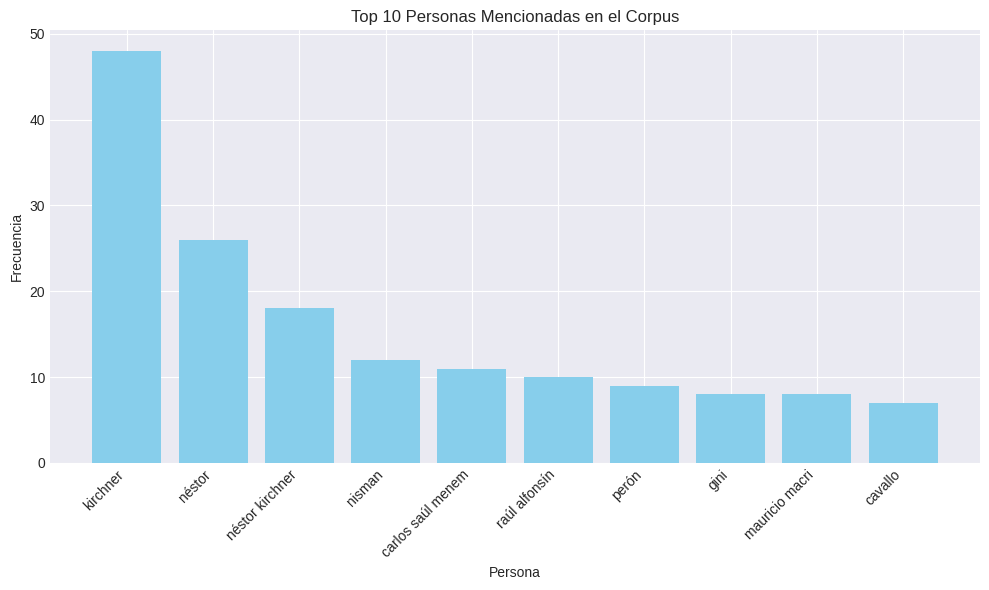

Visualización completada.


In [68]:
print("\n--- Visualización de Top 10 PERSONAS ---")

# Ensure contador_personas is available
if 'contador_personas' in locals():
    # Get the top 10 most common persons and their counts
    top_10_personas = contador_personas.most_common(10)

    # Extract names and counts for plotting
    nombres_personas = [persona for persona, frecuencia in top_10_personas]
    frecuencias_personas = [frecuencia for persona, frecuencia in top_10_personas]

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(nombres_personas, frecuencias_personas, color='skyblue')
    plt.xlabel("Persona")
    plt.ylabel("Frecuencia")
    plt.title("Top 10 Personas Mencionadas en el Corpus")
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

    print("Visualización completada.")

else:
    print("Error: 'contador_personas' no encontrado. Asegúrese de ejecutar la celda de Extracción de Entidades Nombradas.")


--- Visualización de Top 10 ORGANIZACIONES ---


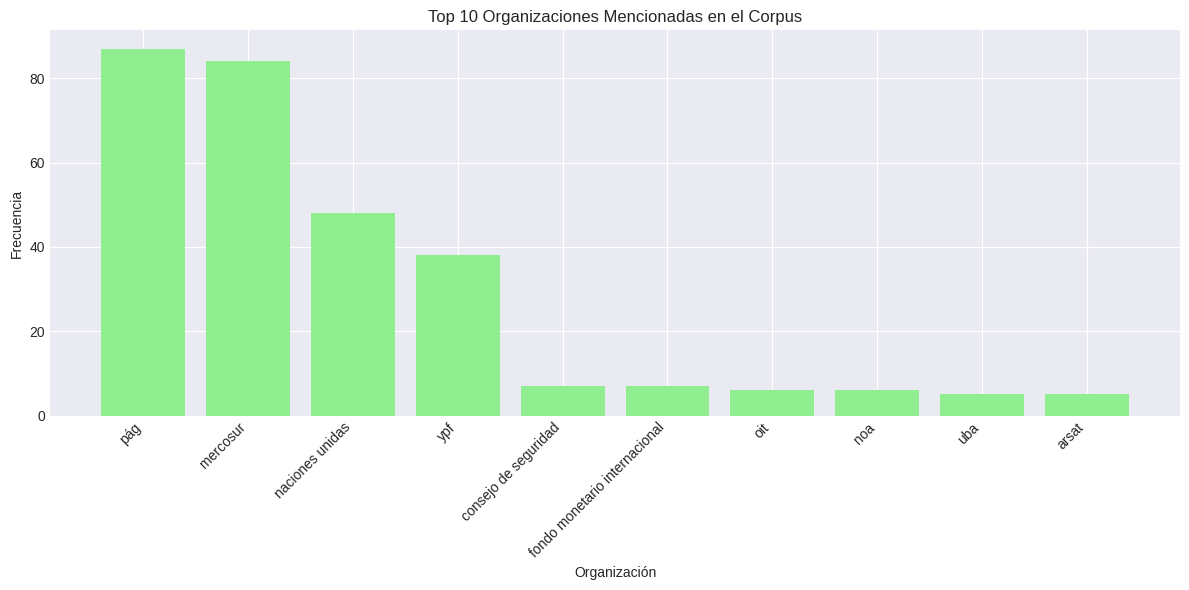

Visualización completada.


In [69]:
print("\n--- Visualización de Top 10 ORGANIZACIONES ---")

# Ensure contador_orgs is available
if 'contador_orgs' in locals():
    # Get the top 10 most common organizations and their counts
    top_10_orgs = contador_orgs.most_common(10)

    # Extract organization names and counts for plotting
    nombres_orgs = [org for org, frecuencia in top_10_orgs]
    frecuencias_orgs = [frecuencia for org, frecuencia in top_10_orgs]

    # Create the bar plot
    plt.figure(figsize=(12, 6))
    plt.bar(nombres_orgs, frecuencias_orgs, color='lightgreen')
    plt.xlabel("Organización")
    plt.ylabel("Frecuencia")
    plt.title("Top 10 Organizaciones Mencionadas en el Corpus")
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

    print("Visualización completada.")

else:
    print("Error: 'contador_orgs' no encontrado. Asegúrese de ejecutar la celda de Extracción de Entidades Nombradas.")

---

## Parte 3: Especificaciones de Entrega

### Estructura del Repositorio GitHub

Tu repositorio debe tener **exactamente** esta estructura:

```
apellido-nombre-nlp-integrador/
├── README.md                          # Descripción del proyecto
├── corpus/
│   ├── raw_texts/                     # Textos originales
│   │   ├── 01_texto.txt
│   │   ├── 02_texto.txt
│   │   ├── ...
│   │   └── XX_texto.txt
│   ├── metadata.csv                   # Información de los textos
│   └── processed/                     # Datos procesados (opcional)
│       └── corpus_limpio.pkl
├── notebooks/
│   └── analisis_integrador.ipynb     # Notebook principal
├── visualizations/                   # Gráficos generados
│   ├── nube_palabras.png
│   ├── frecuencias.png
│   └── similitud_docs.png
└── requirements.txt                   # Dependencias necesarias
```

### README.md Obligatorio

Tu README debe incluir **exactamente** esta información:

```markdown
# Análisis de NLP: [Título Descriptivo de Tu Corpus]

## Descripción
Breve descripción (2-3 párrafos) del corpus elegido, objetivos del análisis,
y principales hallazgos encontrados.

## Información del Corpus
- **Tipo**: [Música/Literatura/Periodismo/Digital]
- **Tamaño**: X textos, aproximadamente Y palabras totales
- **Fuentes principales**: [Listar las fuentes más importantes]
- **Período temporal**: [Si aplicable]
- **Criterios de selección**: [Brevemente explicar por qué elegiste estos textos]

## Técnicas de NLP Aplicadas
- Preprocesamiento de texto (limpieza, tokenización, stop words)
- Análisis con Bag of Words (BoW) y TF-IDF
- Análisis con Word Embeddings (spaCy)
- [Técnica complementaria aplicada: POS/Sentiment/NER]

## Principales Hallazgos
- [Hallazgo más importante #1]
- [Hallazgo más importante #2]
- [Hallazgo más importante #3]
- [Comparación entre métodos: cuál funcionó mejor y por qué]

## Tecnologías Utilizadas
- Python 3.x
- pandas, numpy
- scikit-learn
- spaCy
- matplotlib, seaborn
- [Otras librerías específicas que hayas usado]

## Instrucciones de Reproducción
1. Clonar este repositorio
2. Instalar dependencias: `pip install -r requirements.txt`
3. Ejecutar el notebook: `jupyter notebook notebooks/analisis_integrador.ipynb`

## Limitaciones y Trabajo Futuro
- [Principal limitación encontrada]
- [Qué análisis te gustaría hacer en el futuro]

## Autor
[Tu nombre] - [Tu email o GitHub]
Trabajo Integrador - NLP - [Fecha]
```

### Archivo requirements.txt

Incluí todas las librerías que usaste:

```
pandas>=1.3.0
numpy>=1.21.0
scikit-learn>=1.0.0
spacy>=3.4.0
matplotlib>=3.5.0
seaborn>=0.11.0
nltk>=3.7.0
wordcloud>=1.8.0
jupyter>=1.0.0
```